# Analysis of team performance

## Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_128473/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('races.csv')
df = df[df.team1.str.startswith('Wild')]
df = df[['division', 'team1', 'time_tot', 'name1', 'start_chng1', 'time1', 'name2', 'start_chng2', 'time2', 'name3', 'start_chng3', 'time3', 'name4', 'start_chng4', 'time4']]
df.shape

(1113, 15)

In [4]:
df.head(2)

,division,team1,time_tot,name1,start_chng1,time1,name2,start_chng2,time2,name3,start_chng3,time3,name4,start_chng4,time4
0,1,WildRunners dreamers,17.01,Sunny,-0.24,4.21,Dixie,0.30,4.24,Alex,0.16,4.22,Hector,0.0,4.13
1,1,WildRunners Maximini,19.43,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,0.0,4.28


In [5]:
df_run1 = df[['division', 'team1', 'name1', 'start_chng1', 'time1']]
df_run2 = df[['division', 'team1', 'name2', 'start_chng2', 'time2']]
df_run3 = df[['division', 'team1', 'name3', 'start_chng3', 'time3']]
df_run4 = df[['division', 'team1', 'name4', 'start_chng4', 'time4']]

col_names = ['division', 'team', 'name', 'start_chng', 'time']
df_run1.columns = col_names
df_run2.columns = col_names
df_run3.columns = col_names
df_run4.columns = col_names

df_run1 = df_run1.dropna()
df_run2 = df_run2.dropna()
df_run3 = df_run3.dropna()
df_run4 = df_run4.dropna()

df_runs_234 = pd.concat([df_run2, df_run3, df_run4], axis=0)

df_runs_all = pd.concat([df_run1, df_run2, df_run3, df_run4], axis=0)
df_runs_all.shape

(4382, 5)

In [6]:
df_run1.head(2)

,division,team,name,start_chng,time
0,1,WildRunners dreamers,Sunny,-0.24,4.21
1,1,WildRunners Maximini,Brooke,-0.11,4.08


In [7]:
df_teams = pd.DataFrame({
    'name': df.team1.unique(), 
    'runs': 0,
    'wrong_start': 0,
    'good_start': 0,
    'total_start': 0.0,
    'wrong_change': 0,
    'good_change': 0,
    'total_change': 0.0,
    'total_time': 0.0
})

df_teams.set_index('name', inplace=True)
df_teams.head()

,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time
name,,,,,,,,
WildRunners dreamers,0,0,0,0.0,0,0,0.0,0.0
WildRunners Maximini,0,0,0,0.0,0,0,0.0,0.0
WildRunners hopefuls,0,0,0,0.0,0,0,0.0,0.0
WildRunners XXL,0,0,0,0.0,0,0,0.0,0.0
WildRunners Zephyr,0,0,0,0.0,0,0,0.0,0.0


In [8]:
for _, row in df_run1.iterrows():
    division, team, name, start, time = row
    df_teams.loc[team, 'runs'] += 1
    df_teams.loc[team, 'total_time'] += time

    if start < 0:
        df_teams.loc[team, 'wrong_start'] += 1
    else:
        df_teams.loc[team, 'good_start'] += 1
        df_teams.loc[team, 'total_start'] += start

for _, row in df_runs_234.iterrows():
    division, team, name, change, time = row
    if change < 0:
        df_teams.loc[team, 'wrong_change'] += 1
    else:
        df_teams.loc[team, 'good_change'] += 1
        df_teams.loc[team, 'total_change'] += change

df_teams['wrong_start_ratio'] = df_teams['wrong_start'] / df_teams['runs'] * 100
df_teams['wrong_change_ratio'] = df_teams['wrong_change'] / df_teams['runs'] * 100
df_teams['avg_start'] = df_teams['total_start'] / df_teams['good_start']
df_teams['avg_change'] = df_teams['total_change'] / df_teams['good_change']
df_teams['avg_time'] = df_teams['total_time'] / df_teams['runs']
df_teams.head()


,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time,wrong_start_ratio,wrong_change_ratio,avg_start,avg_change,avg_time
name,,,,,,,,,,,,,
WildRunners dreamers,175,26,149,14.525,42,478,124.23,717.33,14.857143,24.000000,0.097483,0.259895,4.099029
WildRunners Maximini,225,31,194,24.254,72,597,207.31,972.44,13.777778,32.000000,0.125021,0.347253,4.321956
WildRunners hopefuls,187,20,167,22.104,69,493,107.45,745.31,10.695187,36.898396,0.132359,0.217951,3.985615
WildRunners XXL,114,37,77,17.166,37,301,159.61,586.31,32.456140,32.456140,0.222935,0.530266,5.143070
WildRunners Zephyr,201,29,172,49.065,69,553,377.91,900.68,14.427861,34.328358,0.285262,0.683382,4.480995


## Number of runs per team

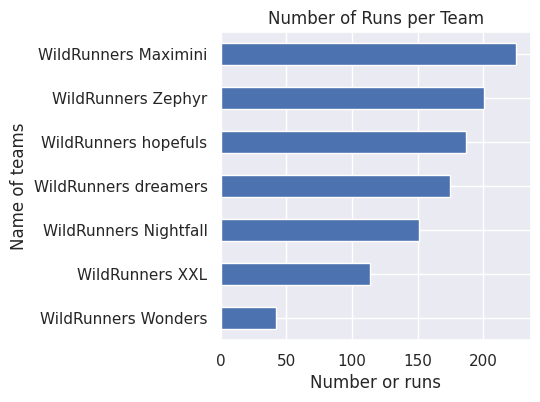

In [9]:
sns.set_theme(rc={"figure.figsize": (4, 4)})
df_teams['runs'].sort_values(ascending=True).plot.barh(width=0.5)
plt.xlabel('Number or runs')
plt.ylabel('Name of teams')
plt.title('Number of Runs per Team')
plt.show()

## Average total time

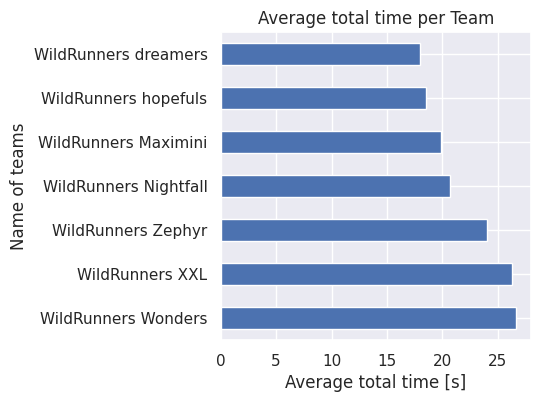

In [10]:
df.groupby('team1').time_tot.mean().sort_values(ascending=False).plot.barh(width=0.5)
plt.xlabel('Average total time [s]')
plt.ylabel('Name of teams')
plt.title('Average total time per Team')
plt.show()

## Average run time

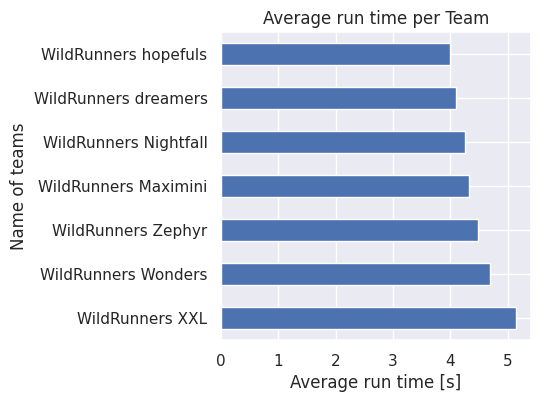

In [11]:
df_teams['avg_time'].sort_values(ascending=False).plot.barh(width=0.5)
plt.xlabel('Average run time [s]')
plt.ylabel('Name of teams')
plt.title('Average run time per Team')
plt.show()

## Ratio of wrong starts

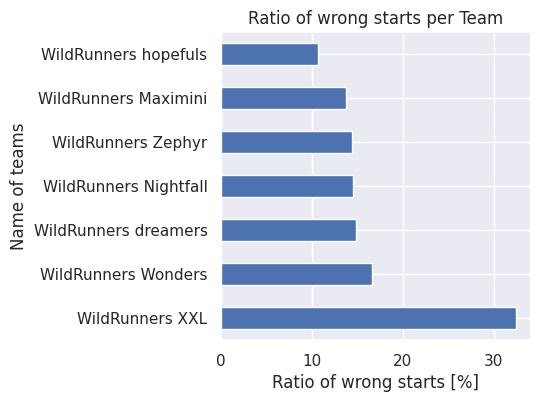

In [12]:
df_teams['wrong_start_ratio'].sort_values(ascending=False).plot.barh(width=0.5)
plt.xlabel('Ratio of wrong starts [%]')
plt.ylabel('Name of teams')
plt.title('Ratio of wrong starts per Team')
plt.show()

## Ratio of wrong changes

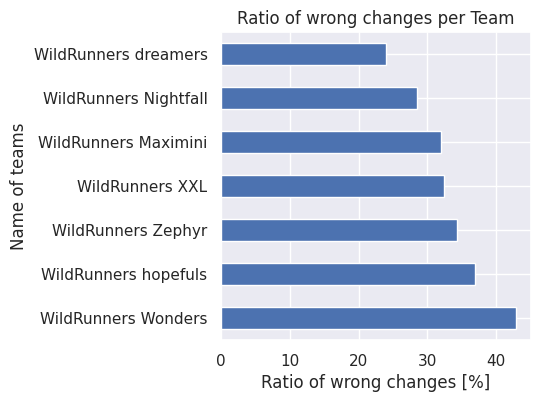

In [13]:
df_teams['wrong_change_ratio'].sort_values(ascending=False).plot.barh(width=0.5)
plt.xlabel('Ratio of wrong changes [%]')
plt.ylabel('Name of teams')
plt.title('Ratio of wrong changes per Team')
plt.show()

## Average start time

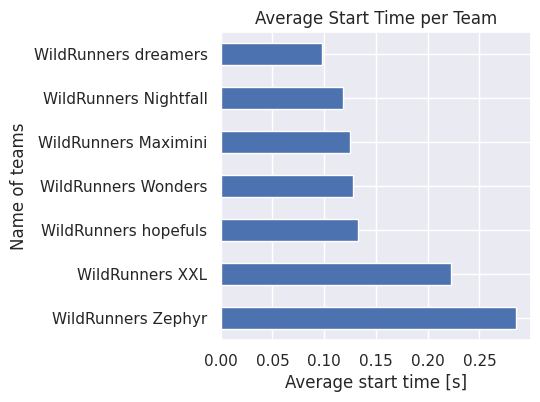

In [14]:
df_teams['avg_start'].sort_values(ascending=False).plot.barh(width=0.5)
plt.xlabel('Average start time [s]')
plt.ylabel('Name of teams')
plt.title('Average Start Time per Team')
plt.show()

## Average change time

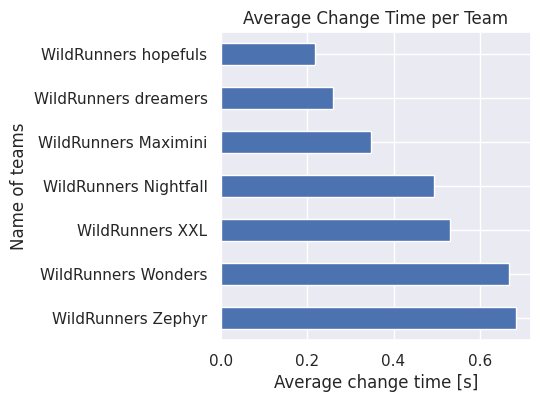

In [15]:
df_teams['avg_change'].sort_values(ascending=False).plot.barh(width=0.5)
plt.xlabel('Average change time [s]')
plt.ylabel('Name of teams')
plt.title('Average Change Time per Team')
plt.show()